# CMOR 350 Final

---

## Question 1

*Suppose that a patient in a hospital is categorized into one of the three conditions at the beginning of each day: good, fair or critical. At the beginning of the next day, the patient will either still be in the hospital and be in good, fair or critical condition or will be discharged in one of the two conditions: improved or unimproved. The transition
probabilities for the situation are as follows*

We'll take the given rate matrixes, and define the 5 states:
$$
S=\{1,2,3,4,5\}\\
Where\\
Good \mapsto 1\\
Fair \mapsto 2\\
Critical \mapsto 3\\
Improved \mapsto 4\\
Unimproved \mapsto 5\\
$$

With Rate Matrix
$$
P = \begin{bmatrix}
0.65 & 0.20 & 0.05 & 0.08 & 0.02 \\
0.50 & 0.30 & 0.12 & 0.05 & 0.03 \\
0.51 & 0.25 & 0.20 & 0.02 & 0.02 \\
0.00 & 0.00 & 0.00 & 1.00 & 0.00 \\
0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
\end{bmatrix}

$$

In [358]:
# there are 5 states of the system
# here's the transition probability matrix
P = [#G = 1, F = 2, C = 3, I = 4, U = 5
    [0.65,0.20,0.05,0.08,0.02], # Good
    [0.50,0.30,0.12,0.05,0.03], # Fair
    [0.51,0.25,0.20,0.02,0.02], # Critical
    [0.00,0.00,0.00,1.00,0.00], # Improved
    [0.00,0.00,0.00,0.00,1.00], # Unimproved
    ]

Let's check to see if all rows add to 1.

In [359]:
import numpy as np
row_sums = np.sum(P, axis=1)
print(row_sums)


[1. 1. 1. 1. 1.]


Ok good. Everything adds to 1. The rate matrix is now valid.

Let's check it against the prompt:

*For example, a patient who begins the day in fair condition has a `50%` chance of being in good condition, `30%` chance of being in fair condition, `12%` chance of being in critical condition the next day, and a `5%` chance of being discharged from the hospital the next day in improved condition and a `3%` chance of being discharged the next day in unimproved condition*

That would be state 2-Fair (index 1):

In [360]:
P[1]

[0.5, 0.3, 0.12, 0.05, 0.03]

---

### Question A
*(10 pts) Consider a patient who enters the hospital in fair condition. On average, how many days does this patient spend in the hospital?*

To solve this, we'll need to figure out the first passage time from state Fair (`state 2`) to either discharged states (Improved-`4`, or unimproved-`5`).

The formula for the first time passage probability in a Discrete-Time Markov Chain (DTMC) can be expressed as follows:

![First Time Passage Equation](DTMC_first_passage_time.png)

$$\mu_{ij}=1+\sum_{k\ne j}p_{ik}\mu_{kj}$$

Where ($ \mu_{ij} $) represents the expected time of transitioning from state ($ i $) to state ($ j $) for the first time after ($ n $) steps in the DTMC.

For the purpose of this, we'll define the rate matrix $P^\prime$ where state 4 is "improved" or "unimproved" (e.g., discharged in general.)

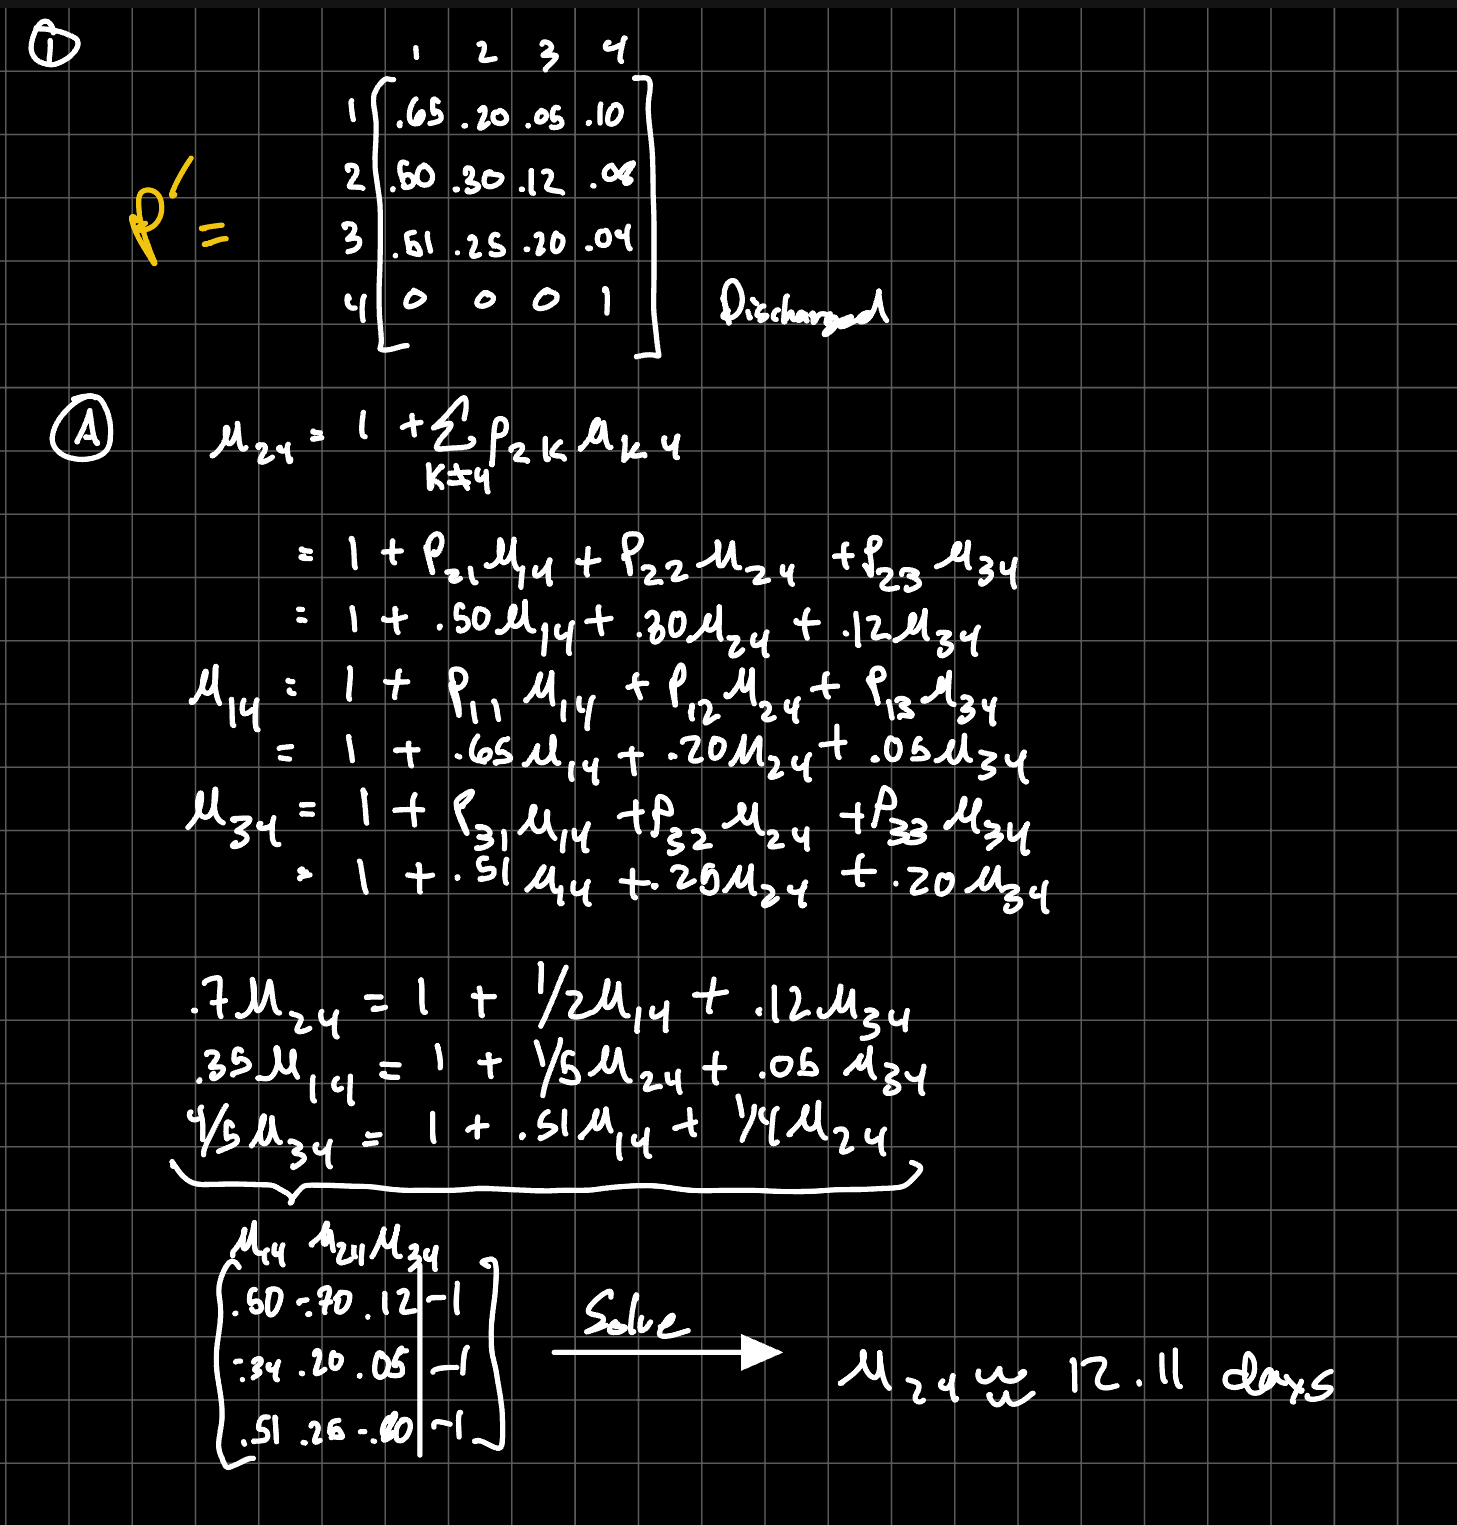

In [361]:
import numpy as np

# Define the matrix A and vector b
A = np.array([
    [.5,-.7,.12],
    [-.35,.2,.05], ## I double checked my work it should be -.35 not -.34
    [.51,.25,-.8]
])

b = np.array([-1, -1, -1])

# Solve for x using numpy's linear algebra solver
x1 = np.linalg.solve(A, b)

x1[1] # mu24

11.317235396182765

This patient will spends $\approx 11.317235396182765$ days in the hopsital.

---

## Question B
*b) (10 pts) There were 300 patients in good condition, 500 patients in fair condition, 200 patients in critical condition in the hospital this morning. Tomorrow morning the following admissions will be made: 50 good condition patients, 40 fair condition patients, and 30 critical condition patients. What is your prediction for tomorrow’s morning hospital census? That is, how many patients will there be in each group tomorrow morning?*

To represent this as a vector let's consider today's distribution, $\vec d_0$ and tomorrow's $\vec d_1$
$$
\begin{align}
\vec d_0 &= [300,500,200,0,0]\\
\vec d_1 &= [50,40,30,0,0]
\end{align}
$$

We'd expect the expected distribution of patients tomorrow to be:
$$d_0\times P^{(1)}+d_1$$

Where 
$$
P = \begin{bmatrix}
0.65 & 0.20 & 0.05 & 0.08 & 0.02 \\
0.50 & 0.30 & 0.12 & 0.05 & 0.03 \\
0.51 & 0.25 & 0.20 & 0.02 & 0.02 \\
0.00 & 0.00 & 0.00 & 1.00 & 0.00 \\
0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
\end{bmatrix}
$$

Thus



$$
[300,500,200,0,0] \times 

\begin{bmatrix}
0.65 & 0.20 & 0.05 & 0.08 & 0.02 \\
0.50 & 0.30 & 0.12 & 0.05 & 0.03 \\
0.51 & 0.25 & 0.20 & 0.02 & 0.02 \\
0.00 & 0.00 & 0.00 & 1.00 & 0.00 \\
0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
\end{bmatrix}

+[50,40,30,0,0]
$$

Would be the final distribution

In [362]:
# Define the initial vector and the transition matrix, and the additional vector
initial_vector = np.array([300, 500, 200, 0, 0])
transition_matrix = np.array([
    [0.65, 0.20, 0.05, 0.08, 0.02],
    [0.50, 0.30, 0.12, 0.05, 0.03],
    [0.51, 0.25, 0.20, 0.02, 0.02],
    [0.00, 0.00, 0.00, 1.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 1.00]
])
additional_vector = np.array([50, 40, 30, 0, 0])

# Perform the matrix multiplication and addition
result_vector = initial_vector.dot(transition_matrix) + additional_vector
result_vector


array([597., 300., 145.,  53.,  25.])

In [363]:
result_vector[0]+result_vector[1]+result_vector[2]

1042.0

In [364]:
result_vector[3]+result_vector[4]

78.0

At the end of today, we'd expect `78` patients to discharge from the hospital, with a total of `1042` patients in the hopsital tomorrow morning (including the newly admitted patients).

Tomorrow morning, we'd expect patients in the following conditions
* 597 - Good
* 300 - Fair
* 145 - Critical

---
## Question C

*c) (10 pts) What fraction of patients who enter the hospital in fair condition will leave the hospital in improved condition?*

To answer this question, we'll use the Probability of Absorption concepts 

![Probability of Absorption](DTMC_probability_of_absorption.png)

### Probability of Absorption
$$f_{ij}=\sum_{k\in S}p_{ik}f_{kj}

### Solving for $f_{24}$, we get:

\begin{align*}
f_{14} &= 0.65f_{14} + 0.20f_{24} + 0.05f_{34} + 0.08 \cdot 1 + 0.02 \cdot 0 \\
f_{24} &= 0.50f_{14} + 0.30f_{24} + 0.12f_{34} + 0.05 \cdot 1 + 0.03 \cdot 0 \\
f_{34} &= 0.51f_{14} + 0.25f_{24} + 0.20f_{34} + 0.02 \cdot 1 + 0.02 \cdot 0 \\
\end{align*}

Rearranging these equations to the standard form:

$$
\begin{bmatrix}
0.35 & -0.20 & -0.05 \\
-0.50 & 0.70 & -0.12 \\
-0.51 & -0.25 & 0.78 \\
\end{bmatrix}
\begin{bmatrix}
f_{14} \\
f_{24} \\
f_{34} \\
\end{bmatrix}
=
\begin{bmatrix}
0.08 \\
0.05 \\
0.02 \\
\end{bmatrix}
$$

In [365]:
# Define the matrix A and vector b for the absorption probabilities
A_absorption = np.array([
    [0.35, -0.20, -0.05],
    [-0.50, 0.70, -0.12],
    [-0.51, -0.25, 0.78]
])

b_absorption = np.array([0.08, 0.05, 0.02])

# Solve for f14, f24, f34 using numpy's linear algebra solver
absorption_probabilities = np.linalg.solve(A_absorption, b_absorption)
absorption_probabilities


array([0.76795955, 0.75175068, 0.76871416])

In [366]:
f24= absorption_probabilities[1]
f24

0.7517506791427708

### Setting up the system of equations for $f_{25}$:
From the transition matrix:
$$
\begin{align*}
f_{15} &= 0.65f_{15} + 0.20f_{25} + 0.05f_{35} + 0.08 \cdot 0 + 0.02 \cdot 1 \\
f_{25} &= 0.50f_{15} + 0.30f_{25} + 0.12f_{35} + 0.05 \cdot 0 + 0.03 \cdot 1 \\
f_{35} &= 0.51f_{15} + 0.25f_{25} + 0.20f_{35} + 0.02 \cdot 0 + 0.02 \cdot 1 \\
\end{align*}
$$

Rearranging these to the standard form:

$$
\begin{bmatrix}
0.35 & -0.20 & -0.05 \\
-0.50 & 0.70 & -0.12 \\
-0.51 & -0.25 & 0.78 \\
\end{bmatrix}
\begin{bmatrix}
f_{15} \\
f_{25} \\
f_{35} \\
\end{bmatrix}
=
\begin{bmatrix}
0.02 \\
0.03 \\
0.02 \\
\end{bmatrix}
$$

In [367]:
# Define the matrix A and vector b for the absorption probabilities to "Unimproved"
A_absorption = np.array([
    [0.35, -0.20, -0.05],
    [-0.50, 0.70, -0.12],
    [-0.51, -0.25, 0.78]
])

b_absorption = np.array([0.02, 0.03, 0.02])

# Solve for f15, f25, f35 using numpy's linear algebra solver
absorption_probabilities_unimproved = np.linalg.solve(A_absorption, b_absorption)
f25 = absorption_probabilities_unimproved[1]
f25

0.2684726833685482

Since $f_{24}$ and $f_{25}$ are the only absorbing states for this system, we can model the following:

$$P(\text{Patient enters the hospital in fair condition and leaves in improved condition})=\frac{f_{24}}{f_{24}+f_{25}}$$

In [368]:
f24/(f25+f24)

0.7368491124260355

About 73% of patients who enter the hospital in fair condition will leave in an improved condition.

---

---
# Question 2
2) College Park, a small college town, has two ambulances. Ambulance 1 is based at the college campus, and ambulance 2 is based downtown.

* If a request for an ambulance comes from anywhere else in the town,
    * the downtown-based ambulance is sent, if available. 
    * Otherwise, the college-based ambulance is sent, if available. 
* If no ambulance is available, 
    * the call is considered to be lost.
* If a request for an ambulance comes from the college, 
    * the college-based ambulance is sent if it is available. 
    * Otherwise, the downtown-based ambulance is sent, if available. 
    * If no ambulance is available, 
        * the call is assumed to be lost.
* An average of 3 calls per hour are received from the college, and 
* an average of 4 calls per hour are received from the rest of the town. 

* For both call types, the times in between calls are independent and identically distributed exponential random variables. 
* The average time (exponentially distributed) it takes an ambulance to service a call (respond to a call and be ready to respond to another call at the base) is shown in the table below.

![ambulance_response](ambulance_response.png)

---

## Question A

*a) (5 pts) Given 5 calls have arrived in an hour, what is the probability that there were 2 calls received from college and 3 calls were received from rest of the town?*

### Setting up my vars

let
* C be the number of calls from the college, 
* D be the number of calls from downtown
* X be the number of calls in an hour


The question is therefore asking us to evaluate:

$$P(C=2, D=3|C+D=5)$$

let
* $N_C \sim Exp(1/3),\lambda_C=3$, where $N_C$ is the number of calls per hour from the college
* $N_D \sim Exp(1/4),\lambda_D=4$, where $N_D$ is the number of calls per hour from the city
* p, the chance that a call comes from the college

$$
p=\frac{\lambda_C}{\lambda_C+\lambda_D}=\frac{3}{7}
$$

Thus we can model this as:

$$P(C=k|C+D=n)=\binom{n}{k}p^k(1-p)^{n-k}$$

$$P(C=2, D=3|C+D=5)=\binom{5}{2}p^2(1-p)^{5-2}\approx 0.34271434521330396$$

In [369]:
from scipy.stats import binom

# Re-defining parameters for the binomial distribution
n = 5  # total number of calls
k = 2  # number of calls from college
p = 3/7  # probability of a call being from college

# Calculate the probability using the binomial probability mass function
probability = binom.pmf(k, n, p)
probability


0.34271434521330396

The liklihood is therefore about `0.34271434521330396`

---

## Question B

*b) (10 pts) Model this system as a continuous-time Markov chain. Define the states and give the rate matrix.*


let 
$X(t),X(t)\in\{0,1,2\}$ be the r.v. that represents the # of ambulances busy at time t.

However, for this problem, this does not classify the states for this setup.



Let
* $\mu_{CC}$ be the service rate from college ambulance servicing college call
* $\mu_{CD}$ be the service rate from college ambulance servicing downtown call
* $\mu_{DC}$ be the service rate from downtown ambulance servicing college call
* $\mu_{DD}$ be the service rate from downtown ambulance servicing downtown call

![ambulance_response](ambulance_response.png)

In [370]:
# "arrival rates" for downtown calls and college calls
lamD = 4 
lamC = 3

muCC = 60/4 # rate in hours (1,1) in diagram
muCD = 60/7 # rate in hours (1,0) in diagram
muDC = 60/5 # rate in hours (1,1) in diagram
muDD = 60/4 # rate in hours (1,0) in diagram
print('The rates are muCC =', muCC, 'muCD =', muCD, 'muDC =', muDC, 'muDD =', muDD)

The rates are muCC = 15.0 muCD = 8.571428571428571 muDC = 12.0 muDD = 15.0


There's 9 states, corresponding to the $(i,k,j,h)$ for $i,k,j,h\in\{0,1\}$

See the definitions below:
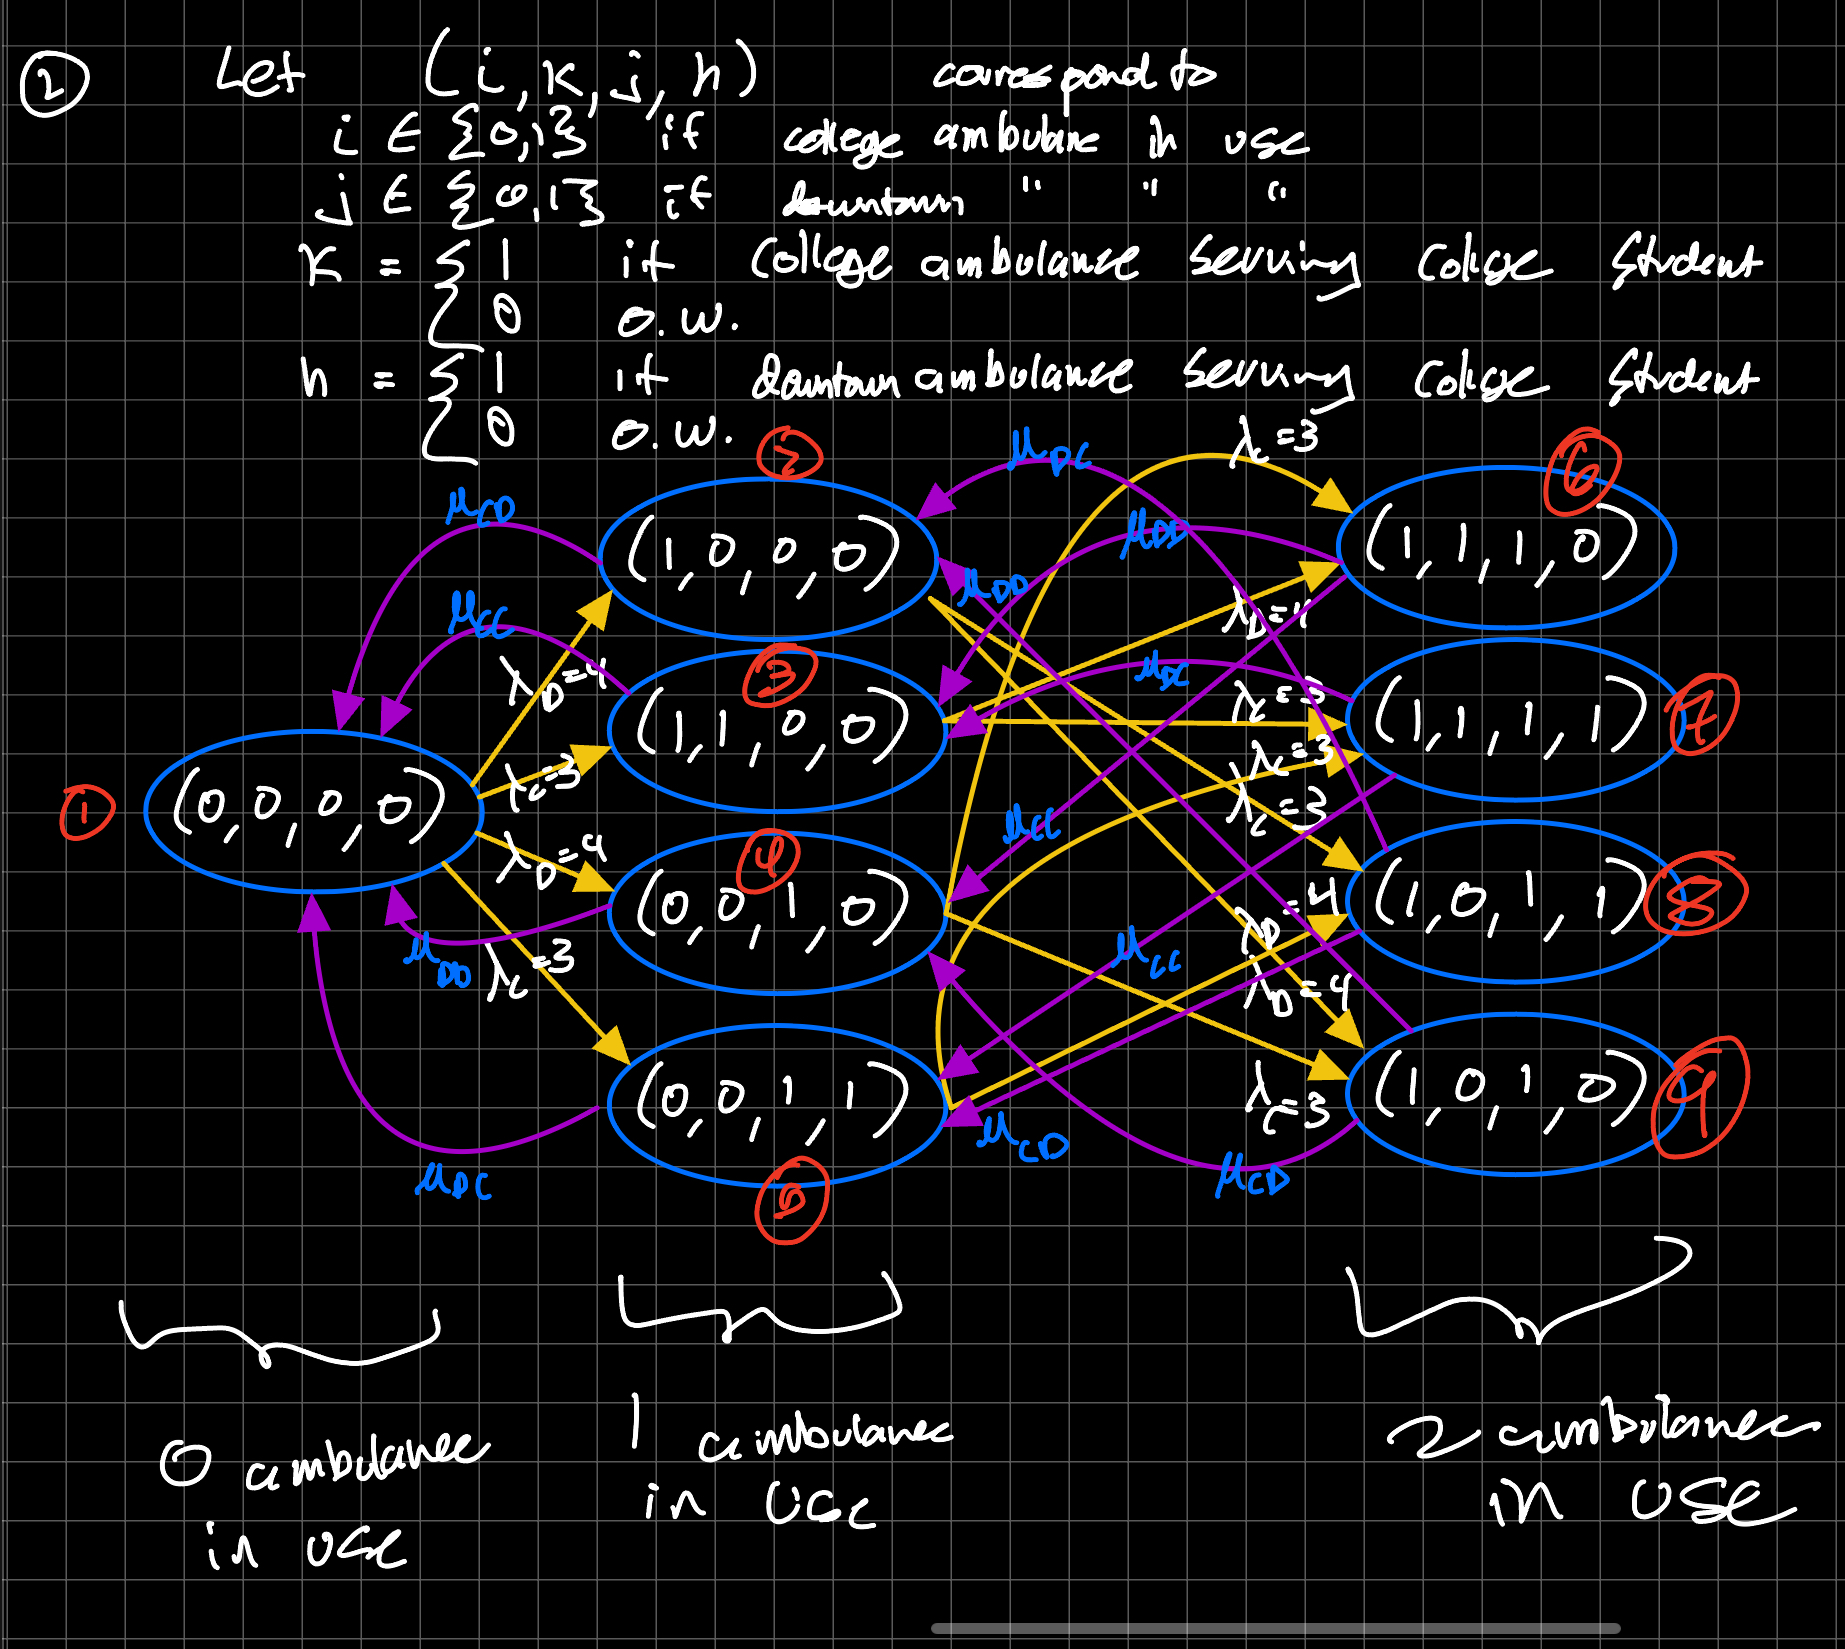


Here's the rate matrix:

In [371]:
R = [#1     #2      #3      #4      #5      #6      #7      #8      #9
    [0,     lamD,   lamC,   lamD,   lamC,   0,      0,      0,      0],     #1
    [muCD,  0,      0,      0,      0,      0,      0,      lamC,   lamD],  #2
    [muCC,  0,      0,      0,      0,      lamD,   lamC,   0,      0],     #3
    [muDD,  0,      0,      0,      0,      lamC,   0,      0,      lamD],  #4 slight error here in the diagram
    [muDC,  0,      0,      0,      0,      0,      lamC,   lamD,   0],     #5
    [0,     0,      muDD,   muCC,   0,      0,      0,      0,      0],     #6
    [0,     0,      muDC,   0,      muCC,   0,      0,      0,      0],     #7
    [0,     muDC,   0,      0,      muCD,   0,      0,      0,      0],     #8
    [0,     muDD,   0,      muCD,   0,      0,      0,      0,      0],     #9
]
R

[[0, 4, 3, 4, 3, 0, 0, 0, 0],
 [8.571428571428571, 0, 0, 0, 0, 0, 0, 3, 4],
 [15.0, 0, 0, 0, 0, 4, 3, 0, 0],
 [15.0, 0, 0, 0, 0, 3, 0, 0, 4],
 [12.0, 0, 0, 0, 0, 0, 3, 4, 0],
 [0, 0, 15.0, 15.0, 0, 0, 0, 0, 0],
 [0, 0, 12.0, 0, 15.0, 0, 0, 0, 0],
 [0, 12.0, 0, 0, 8.571428571428571, 0, 0, 0, 0],
 [0, 15.0, 0, 8.571428571428571, 0, 0, 0, 0, 0]]

$$

R = \begin{bmatrix}
0 & \lambda_D & \lambda_C & \lambda_D & \lambda_C & 0 & 0 & 0 & 0 \\
\mu_{CD} & 0 & 0 & 0 & 0 & 0 & 0 & \lambda_C & \lambda_D \\
\mu_{CC} & 0 & 0 & 0 & 0 & \lambda_D & \lambda_C & 0 & 0 \\
\mu_{DD} & 0 & 0 & 0 & 0 & \lambda_C & 0 & 0 & \lambda_D \\
\mu_{DC} & 0 & 0 & 0 & 0 & 0 & \lambda_C & \lambda_D & 0 \\
0 & 0 & \mu_{DD} & \mu_{CC} & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \mu_{DC} & 0 & \mu_{CC} & 0 & 0 & 0 & 0 \\
0 & \mu_{DC} & 0 & 0 & \mu_{CD} & 0 & 0 & 0 & 0 \\
0 & \mu_{DD} & 0 & \mu_{CD} & 0 & 0 & 0 & 0 & 0
\end{bmatrix}

\text{where} \\
\lambda_D = 4, \\
\lambda_C = 3, \\
\mu_{CD} \approx 8.57, \\
\mu_{CC} = 15, \\
\mu_{DD} = 15, \\
\mu_{DC} = 12\\
$$

---

## Part C
*c) (10 pts) Find the limiting distribution*

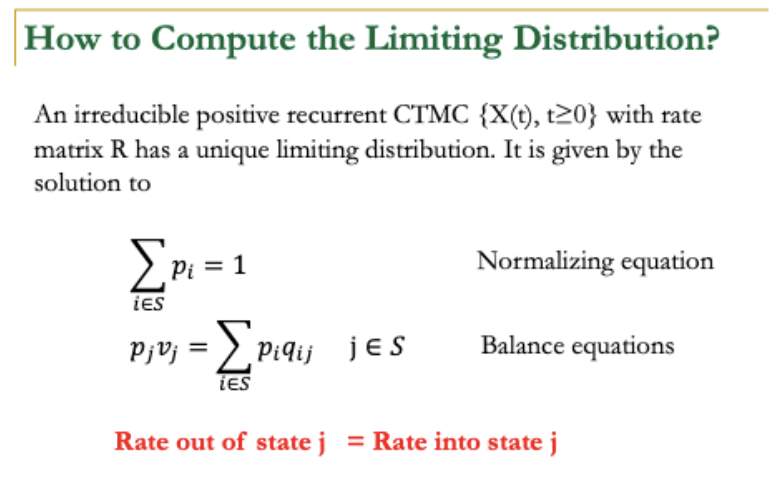

### Norming Equation
$$ \sum_{i\in S}p_i=1\\$$

### Balancing Equations
$$p_j\nu_j=\sum_{i\in S}p_iq_{ij}$$

Where the Rate Matrix: $R=[q_{ij}]$

$\nu_i$ is the sum of each row in R

In [372]:
nu = [sum(nu) for nu in R]
nu

[14,
 15.571428571428571,
 22.0,
 22.0,
 19.0,
 30.0,
 27.0,
 20.57142857142857,
 23.57142857142857]

In [373]:
len(nu)

9

### Norming Equation:
$$p_1+
p_1+
p_2+
p_3+
p_4+
p_5+
p_6+
p_7+
p_8+
p_9=1$$

### Balancing Equations for 9 States

$$
\begin{align*}
p_1 \cdot 14 &= p_2 \cdot \mu_{CD} + p_3 \cdot \mu_{CC} + p_4 \cdot \mu_{DD} + p_5 \cdot \mu_{DC} \\
p_2 \cdot 15.571428571428571 &= p_1 \cdot \lambda_D + p_9 \cdot \mu_{DD} + p_8 \cdot \mu_{DC} \\
p_3 \cdot 22.0 &= p_1 \cdot \lambda_C + p_6 \cdot \mu_{DD} + p_7 \cdot \mu_{DC} \\
p_4 \cdot 22.0 &= p_1 \cdot \lambda_D + p_6 \cdot \mu_{CC} + p_9 \cdot \mu_{CD} \\
p_5 \cdot 19.0 &= p_1 \cdot \lambda_C + p_7 \cdot \mu_{CC} + p_8 \cdot \mu_{CD} \\
p_6 \cdot 30.0 &= p_3 \cdot \lambda_D + p_4 \cdot \lambda_C \\
p_7 \cdot 27.0 &= p_3 \cdot \lambda_C + p_5 \cdot \lambda_C \\
p_8 \cdot 20.57142857142857 &= p_2 \cdot \lambda_C + p_5 \cdot \lambda_D \\
p_9 \cdot 23.57142857142857 &= p_2 \cdot \lambda_D + p_4 \cdot \lambda_D \\
\end{align*}

$$


In [377]:
import numpy as np

# Create the matrix A
A = np.array([
    [-14, muCmuCC + muDD + muDC, 0, 0, 0, 0, 0, 0, 0, 0],  # p1
    [lamD, -15.571428571428571 + muDD + muDC, 0, 0, 0, 0, 0, 0, 0],  # p2
    [lamC, 0, -22 + muDD + muDC, 0, 0, 0, 0, 0, 0],  # p3
    [lamD, 0, 0, -22 + muCC + muCD, 0, 0, 0, 0, 0],  # p4
    [lamC, 0, 0, 0, -19 + muCC + muCD, 0, 0, 0, 0],  # p5
    [0, 0, lamD, lamC, 0, -30, 0, 0, 0],  # p6
    [0, 0, lamC, 0, lamC, 0, -27, 0, 0],  # p7
    [0, lamC, 0, 0, lamD, 0, 0, -20.57142857142857, 0],  # p8
    [1, 1, 1, 1, 1, 1, 1, 1, 1]  # Norming equation
])

# Create the vector b
b = np.zeros(9)  # Zero for balancing equations
b[-1] = 1  # 1 for the norming equation

# Solve the linear system
p = np.linalg.solve(A, b)

# Output the solution
print("Solution for p1 to p9:", p)


Solution for p1 to p9: [ 0.  0.  0.  0.  0.  0. -0. -0.  1.]


### Limiting Distributions

- p_0 ~ **0.627**
- p_1 ~ **0.163**
- p_2 ~ **0.130**
- p_3 ~ **0.037**
- p_4 ~ **0.043**

---

## Part C

*d) (5 pts) What fraction of time is the downtown ambulance busy in the long-run?*

The downtown ambulance is busy in state 1,3, and 4.

In [ ]:
p[1]+p[3]+p[4]

0.3333333333333333

So the downtown ambulance is busy $\approx 24\%$ of the time

---
## Part D

*e) (5 pts) This is a bonus question for 5 extra points. Assume that half of service time is the time required for an ambulance to go from its base to a patient. What are the average waiting times for an ambulance by a college student and a town person? Who waits longer on average?*

Since we'll assume half the time is spent waiting for the ambulance, that means the $E[t] =1/2 \times1/\mu$ so all the $\mu$ are doubled 

$$
R' = 
\begin{bmatrix}
0 & \lambda_D & \lambda_C & 0 & 0 \\
2\mu_{DD} & 0 & 0 & \lambda_C & \lambda_D \\
2\mu_{CC} & 0 & 0 & \lambda_C & \lambda_D \\
0 & 2\mu_{CC} & 2\mu_{CD} & 0 & 0 \\
0 & 2\mu_{DC} & 2\mu_{DD} & 0 & 0 \\
\end{bmatrix}

$$

In [ ]:
wCC=1/muCC*60/2
wCD=1/muCD*60/2
wDC=1/muDC*60/2
wDD=1/muDD*60/2
print('The average time waiting for each call type is wCC =', wCC, 'wCD =', wCD, 'wDC =', wDC, 'wDD =', wDD)

The average time waiting for each call type is wCC = 2.0 wCD = 3.5 wDC = 2.5 wDD = 2.0


The answer is ___ 

---

---

# Question 3

* A machine produces items one at a time, the production times being independent and identically distributed exponential random variables with mean `1` hour. 
* The produced items are stored in a warehouse of capacity `5`. 
* When the warehouse is full the machine is turned off, and 
    * it is turned on again when the warehouse has space for at least one item. 
* Demands for the items arrive according to a Poisson process with rate `20` per day. 
* Any demand that cannot be satisfied is lost.
* Define the state of the system at time t as $X(t)=$ the number of items in the warehouse at time t.

let 
* Service Rate: $\mu=24$ items a day (1/hr) 
* Arrival/Demand Rate: $\lambda=20$ (20/day)
* $k=5$ for the capacity of the system

Since everything is Markovian, this is a M/M/1/5 queueing system

---

## Part A

*a) (6 pts) Model X(t) as a birth and death process. That is, draw the rate diagram and identify the birth and death rates.*


Given:


* Service Rate: $\mu=24$ items a day (1/hr) 
* Arrival/Demand Rate: $\lambda=20$ (20/day)
* $k=5$ for the capacity of the system

See the rate diagram below:

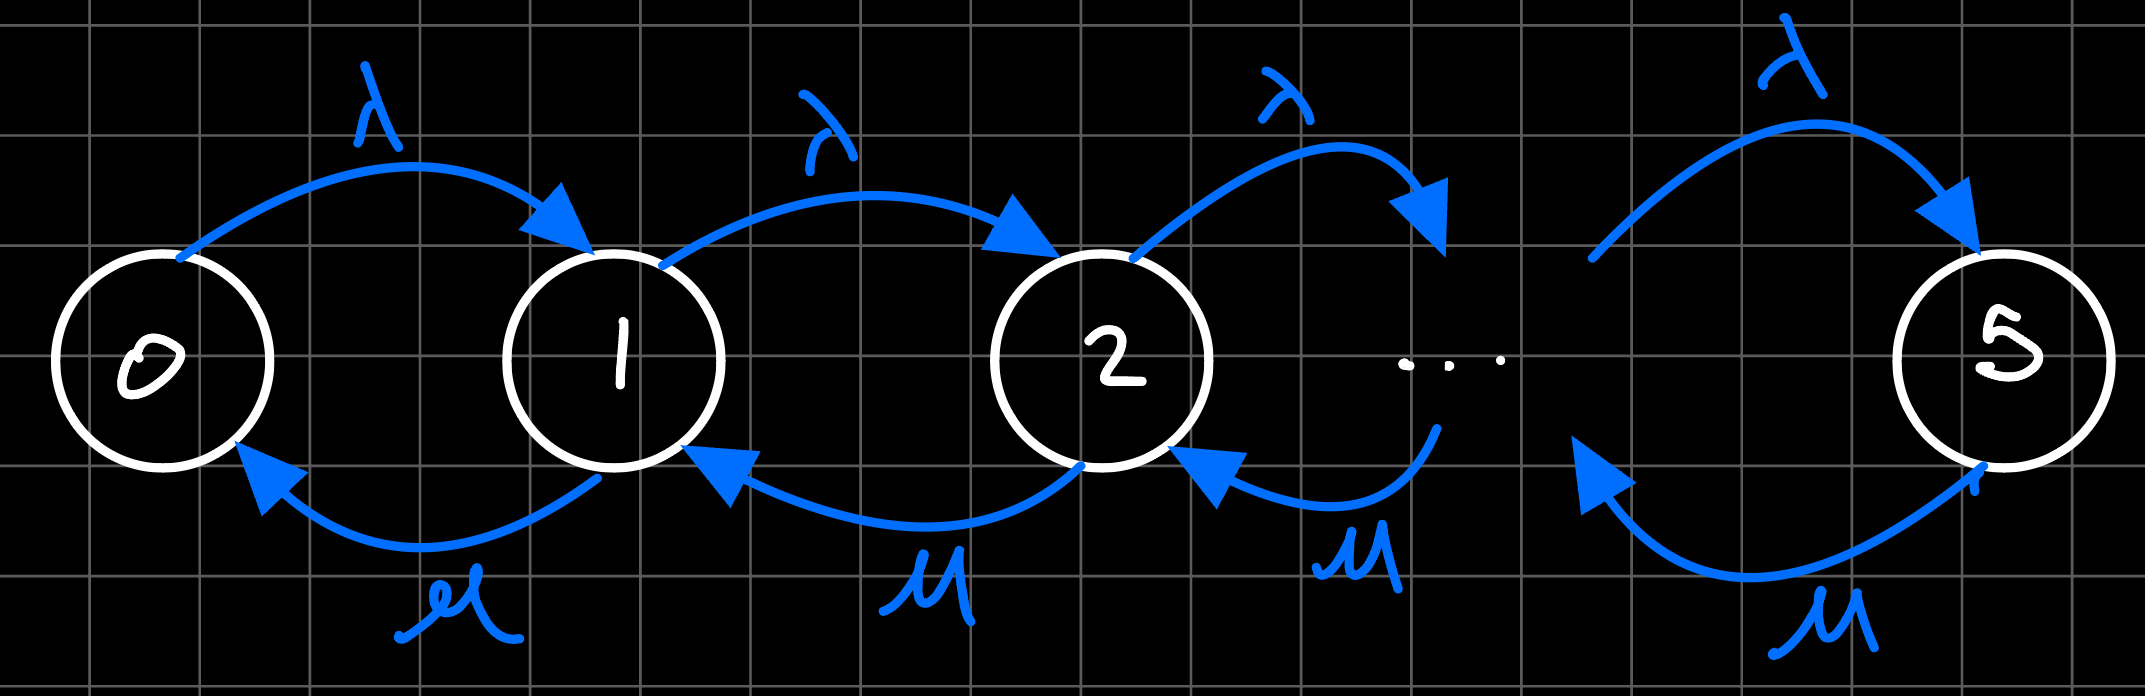


---
## Part B

*b) (3 pts) Based on your rate diagram in part a, in standard nomenclature, what type of a queueing system is this?*

Since everything is Markovian, this is a M/M/1/5 queueing system

---
## Part C

*Answer parts c and d using the formulas for the queueing system that you identified in part b.*

*c) (4 pts) Compute the fraction of time that the machine is turned off in the long-run.*


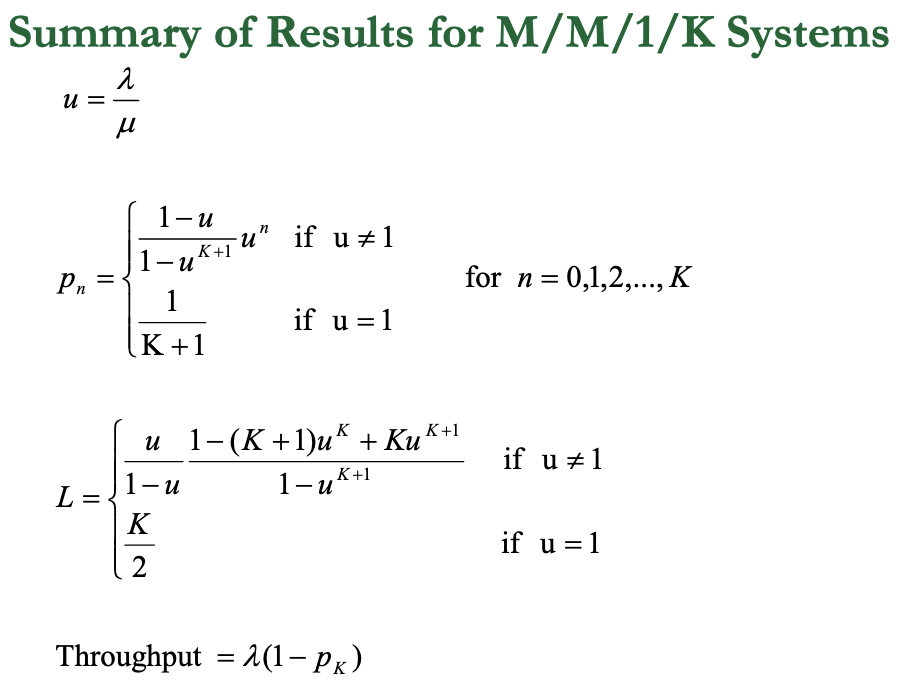

In [ ]:
lam = 20
mu = 24

In [ ]:
u=lam/mu
u

0.8333333333333334

In [ ]:
k=5

In [ ]:
p = [(1-u)/(1-u**(k+1))*u**n for n in range(0,k+1)]
p

[0.25058812155586346,
 0.20882343462988623,
 0.17401952885823854,
 0.14501627404853212,
 0.12084689504044344,
 0.1007057458670362]

In [ ]:
sum(p)

1.0

The value $ p_0 $ would be the chance that the machine is not working, and therefore shut off.

That would be the following:

In [ ]:
p[5]

0.1007057458670362

The fraction of time that the machine is turned off is $$p_5\approx 10.07057458670362\% $$

---
## Part D

*d) (4 pts) What is the rate at which items enter the warehouse?*



If there was no capacity constraint, the rate of items entereing the wearhouse would equal the rate of production of the machine, $\mu=24$.

Since there's is only a capacity of 5, we could formulate the rate of items entering the wearhouse as:

$$
\mu\times(1-p_5)
$$

cutting out the portion of time that the machine cannot produce due to capacity constraints.

In [ ]:
mu*(1-p[5])

21.58306209919113

The adjusted rate would be $\lambda^\prime\approx21.58306209919113$

---
## Part E

*e) Now consider the same problem but with an infinite capacity warehouse.*
*Suppose in this case demand rate is 12 per hour.*

Let
* $\lambda = 288$ for daily demand (12/hr, 24 hrs)

Now we are modeling a M/M/1 system, with no K constraint as the wearhouse has infinity capacity


In [ ]:
lam = 12*24
lam

288

---

### Problem (i)

– (5 pts) What is the largest mean production time so that at most 10% of the demands are lost?

$$E[\text{production time}]=1/\mu$$

Thus $$ max\{E[\text{production time}]\}$$ means we want $$  min\{\mu\} $$

Demand is lost when there are no product to sell, and the wearhouse it empty. This will happen $p_0$ of the time.

For M/M/1, p_n is calculated as 

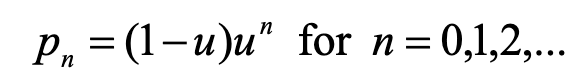

We want $p_0=0.1$

Given 

$$
u = \frac{\lambda}{\mu}
$$

Thus $$ 0.10 = 1 - \frac{\lambda}{\mu} $$

Thus 

$$\mu = \frac{\lambda}{0.90} $$

In [ ]:
mu = lam/.9
mu

320.0

Thus $\mu=320$ produced per day will maximize the expected production time.

---

### Part (ii)

*– (3 pts) What is the expected number of items in the warehouse under this production rate?*


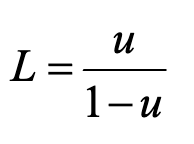

In [ ]:
lam

288

In [ ]:
mu

320.0

In [ ]:
u = lam/mu
L = u/(1-u)
L

9.000000000000002

We'd expect there to be about $L= 9$ items in the system.

---

---

# Question 4

4) We want to efficiently operate a machine that can be in any one of 3 states, denoted 1,2,3. 
* State 1 corresponds to a machine in perfect condition. 
* The cost of operating the machine in state i for one time period is given by g(i), i = 1, 2, 3. 
* In particular, g(1) = $3, g(2) = $5, g(3) = $15. 
* The actions at the start of each period are to 
    * (a) let the machine operate one more period in the state it currently is, or 
    * (b) replace the machine with a new one (state 1) at a cost R = $20. 
* Once replaced, the machine is guaranteed to stay in state 1 for one period. 
* If the machine is in state $i$ at the beginning of a period, it makes a transition into state $j$ with probability $p_{ij}$ at the beginning of next period. 
* The transition probabilities are given by the following matrix:

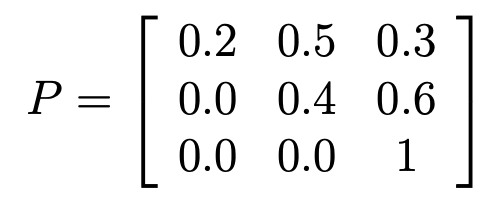

Suppose that the objective is to minimize the total expected cost of operating the machine for T periods.

The terminal cost at the end of the planning horizon of T periods is $\$2_i$ for $i=1,2,3$.


---

## Part A

*a) (8 pts) Formulate this problem as a finite horizon Markov decision process. Define the states and value functions clearly, and present the optimality equations.*

The states are 

$$
S=\{1,2,3\}
$$

The value functions are:

The optimality equation's are as follows

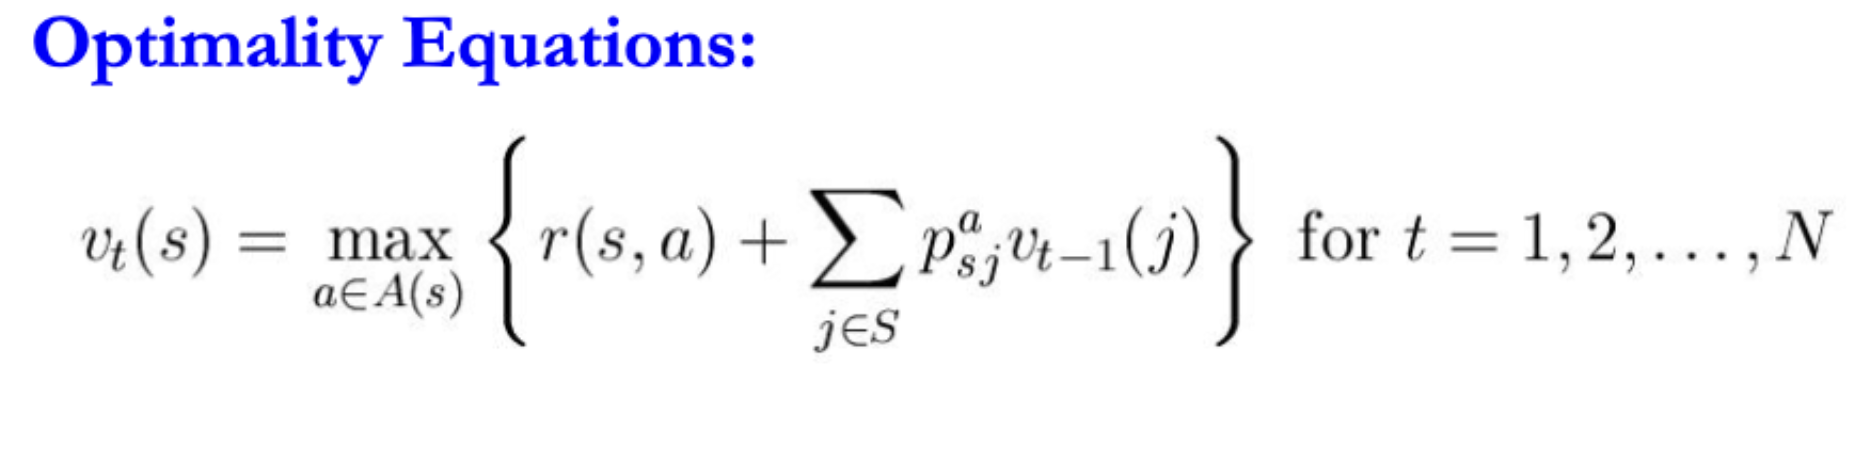


The Optimality Equations:

$$

\begin{align*}
v_n(1) &= \min\{g(1) + 0.2v_{n-1}(1) + 0.5v_{n-1}(2) + 0.3v_{n-1}(3), R + v_{n-1}(1)\} \\
       &= \min\{3 + 0.2v_{n-1}(1) + 0.5v_{n-1}(2) + 0.3v_{n-1}(3), 20 + v_{n-1}(1)\} \\
v_n(2) &= \min\{g(2) + 0.4v_{n-1}(2) + 0.6v_{n-1}(3), R + v_{n-1}(1)\} \\
       &= \min\{5 + 0.4v_{n-1}(2) + 0.6v_{n-1}(3), 20 + v_{n-1}(1)\} \\
v_n(3) &= \min\{g(3) + 1.0v_{n-1}(3), R + v_{n-1}(1)\} \\
       &= \min\{15 + 1.0v_{n-1}(3), 20 + v_{n-1}(1)\} \\
\end{align*}


$$

---

b) (7 pts) Find the optimal operating policy that minimizes the total expected cost over two periods (T = 2) using the backward induction algorithm. Assume that the machine is in state 3 at the start of the first period. You will find the optimal actions at the beginning of first and second periods. Clearly state what the optimal policy is, and give the minimum total expected cost over two periods. Perform your calculations manually showing each step of the backward induction algorithm. Do not use a computer code.

Actions space: do nothing (N), or replace (R)

let v_n(s) be the min expected cost when there are n epoches to go until the end of the planning horizon starting in state s.

$$
\begin{align*}
\text{Initial Setup:}\\
& g = \{3, 5, 15\} \quad \text{(Operating costs for states 1, 2, and 3 respectively)} \\
& R = 20 \quad \text{(Replacement cost)} \\
& v_0 = \{2, 2, 2\} \quad \text{(Terminal costs)}\\

\text{Transition Probabilities:}\\
& P^N = \begin{bmatrix}
0.2 & 0.5 & 0.3 \\
0.0 & 0.4 & 0.6 \\
0.0 & 0.0 & 1.0 \\

\end{bmatrix} \quad \text{(Do Nothing)}\\
& P^R = \begin{bmatrix}
1 & 0 & 0 \\
1 & 0 & 0 \\
1 & 0 & 0 \\
\end{bmatrix} \quad \text{(Replace)}\\

\text{Backward Induction:}\\
n &= 1\\
v_1(1) &= \min\{g(1) + [0.2, 0.5, 0.3] \cdot v_0, R + v_0(1)\} = \min\{3 + 0.2\cdot2 + 0.5\cdot2 + 0.3\cdot2, 20 + 2\} = 5\\
v_1(2) &= \min\{g(2) + [0.0, 0.4, 0.6] \cdot v_0, R + v_0(1)\} = \min\{5 + 0.4\cdot2 + 0.6\cdot2, 20 + 2\} = 7\\
v_1(3) &= \min\{g(3) + [0.0, 0.0, 1.0] \cdot v_0, R + v_0(1)\} = \min\{15 + 1.0\cdot2, 20 + 2\} = 17\\
\text{Actions at T=1:} & \quad \text{['N', 'N', 'N']}\\

n &= 2\\
v_2(1) &= \min\{g(1) + [0.2, 0.5, 0.3] \cdot v_1, R + v_0(1)\} = \min\{3 + 0.2\cdot5 + 0.5\cdot7 + 0.3\cdot17, 20 + 2\} = 12.6\\
v_2(2) &= \min\{g(2) + [0.0, 0.4, 0.6] \cdot v_1, R + v_0(1)\} = \min\{5 + 0.4\cdot7 + 0.6\cdot17, 20 + 2\} = 18\\
v_2(3) &= \min\{g(3) + [0.0, 0.0, 1.0] \cdot v_1, R + v_0(1)\} = \min\{15 + 1.0\cdot17, 20 + 2\} = 25\\
\text{Actions at T=2:} & \quad \text{['N', 'N', 'R']}
\end{align*}
$$